O dataset utilizado para esse desafio é uma versão modificada do arquivo presente no Kaggle: https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit

O link do arquivo raw que vamos usar (aquele usamos para ler direto do Github) é esse aqui: https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv


Aqui o desafio é ler esse arquivo. Para isso importe a numpy e use a função loadtxt. Use o link da url, o parâmetro usecols para pular a primeira coluna. Você pode usar np.arange para criar a sequência de números que representam as colunas. Por fim, você também deve incluir o parâmetro skiprows=1 para que a primeira linha de texto seja desconsiderada na leitura do arquivo.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
url = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'
dado = np.loadtxt(url, delimiter=',',usecols=np.arange(1,6,1),skiprows=1)
dado

array([[  2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       ...,
       [ 15.59, 256.5 , 168.  ,  82.  ,  20.  ],
       [ 15.92, 260.14, 142.  ,  72.  ,  11.  ],
       [ 16.45, 261.51, 152.  ,  74.  ,   2.  ]])

Seleção de dados
Desses a colunas que iremos avaliar são as de diâmetro e peso. Crie um arrays específicos para guardar o diâmetro e peso da laranja e toranja. O diâmtro está na coluna zero e o peso na coluna 1. Os dados referentes a laranja vão até a linha 4999 e os referentes à toranja iniciam na linha 5000 do arquivo.

Text(0, 0.5, 'Peso')

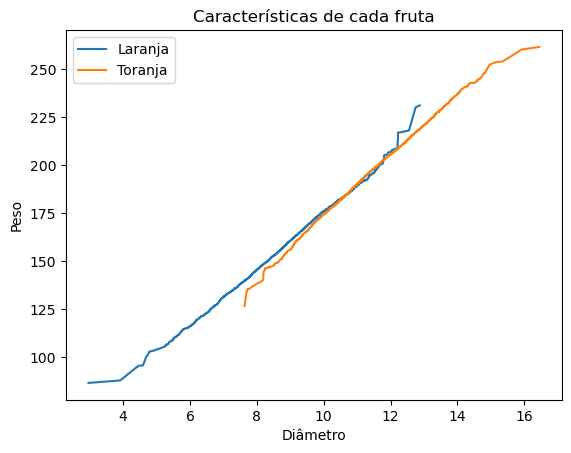

In [19]:
# Seleção de dados
diametro_laranja = dado[:5000,0]
diametro_toranja = dado[5000:,0]
peso_laranja = dado[:5000,1]
peso_toranja = dado[5000:,1]

# Visualizando dos dados
plt.plot(diametro_laranja, peso_laranja)
plt.plot(diametro_toranja, peso_toranja)
plt.legend(['Laranja','Toranja'])
plt.title('Características de cada fruta')
plt.xlabel('Diâmetro')
plt.ylabel('Peso')

O coeficiente das retas
As duas parecem ter uma inclinação muito parecida em uma primeira inspeção visual vamos determinar os coeficientes da reta para cada um dos casos.ear:

Perceba que nesse caso o X é o diâmtro e o Y é o peso. Além disso o n é o número de elementos dentro do X, por exemplo.Ele vai ser diferente para a laranja e toranja. Determine o coefiecente para cada caso:

In [12]:
Y = peso_laranja
X = diametro_laranja
n = np.size(X)

a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2)-np.sum(X)**2)
b = np.mean(Y) - a*np.mean(X)

print('O coeficiente ângular da laranja é:', a)
print('O coeficiente linear da laranja é:', b)

O coeficiente ângular da laranja é: 14.7997452319846
O coeficiente linear da laranja é: 27.38560381218413


In [13]:
Y = peso_toranja
X = diametro_toranja
n = np.size(X)

a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2)-np.sum(X)**2)
b = np.mean(Y) - a*np.mean(X)

print('O coeficiente ângular da toranja é:', a)
print('O coeficiente linear da toranja é:', b)

O coeficiente ângular da toranja é: 15.70884459360376
O coeficiente linear da toranja é: 17.007102876817726


embora a inclinação da reta seja parecida nós descobrimos que os coeficientes da reta servem como uma forma de diferenciar se as frutas são laranjas ou toranjas.

In [16]:
b = 17
norma = np.array([])
np.random.seed(84)
coef_angulares = np.random.uniform(low=0.0,high=30.0,size=100)

for i in range(100):
  norma = np.append(norma,np.linalg.norm(Y- (coef_angulares[i]*X+b)))

norma

array([11693.67355856,  3756.21335179,  6888.14382259,  2567.04685515,
       11420.77932891,  9623.66917996,  8570.85655292,  6496.51679273,
        2577.28271294,  9613.12064833,  5709.72883857,   695.35964734,
       10855.07029288,  5539.82389583,  3137.98293399,   296.30778902,
        8896.93668493,  8347.82090288, 10206.95670568, 10229.7542583 ,
        2193.54863897,  8448.39951623, 11004.80458021, 11563.3388543 ,
        4098.18752189,  7732.70842098,  2801.84736004,  7688.60780777,
       11134.73586307,  9432.12778879,   725.4664674 ,  6290.36141277,
        5189.67184491,  4716.99608173,  9250.47142251,  7274.49676931,
        8876.20611799,   621.16747277,  4716.1854569 ,  8050.51001798,
        9238.31227388,  3992.98429323, 11531.1764187 ,  5849.11139809,
        1042.57303406,  9875.3710071 , 11759.24152592,  8956.15615033,
        2219.50808351,  3585.49846047, 11347.59016791,  2477.87811921,
         878.91891293,  2740.88025627,  1766.171738  ,   710.47076735,
      